In [1]:
import os
import numpy as np
import cv2
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [2]:
import os
import shutil

# Define the base directory containing the folders 0 to 18
base_dir = r"D:\Data Science\Machine Learning\CNN\emotion detection"

# Define the emotion categories
emotions = ["anger", "disgusted", "fearful", "happy", "neutral", "sad", "surprised"]


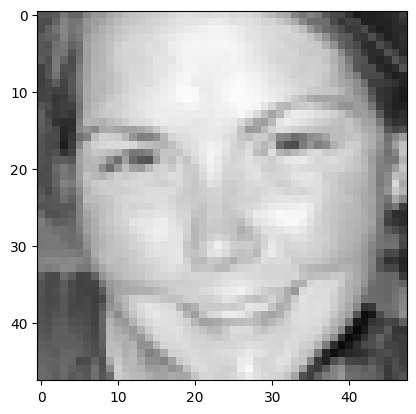

In [3]:
img = image.load_img("train/happy/im1.png")
plt.imshow(img)

In [4]:
cv2.imread("train/happy/im1.png")

array([[[ 85,  85,  85],
        [ 84,  84,  84],
        [ 90,  90,  90],
        ...,
        [ 40,  40,  40],
        [ 46,  46,  46],
        [ 63,  63,  63]],

       [[ 78,  78,  78],
        [ 76,  76,  76],
        [101, 101, 101],
        ...,
        [ 36,  36,  36],
        [ 44,  44,  44],
        [ 52,  52,  52]],

       [[ 76,  76,  76],
        [ 96,  96,  96],
        [115, 115, 115],
        ...,
        [ 34,  34,  34],
        [ 42,  42,  42],
        [ 43,  43,  43]],

       ...,

       [[102, 102, 102],
        [100, 100, 100],
        [ 97,  97,  97],
        ...,
        [ 65,  65,  65],
        [ 76,  76,  76],
        [ 62,  62,  62]],

       [[107, 107, 107],
        [101, 101, 101],
        [ 96,  96,  96],
        ...,
        [ 57,  57,  57],
        [ 79,  79,  79],
        [ 70,  70,  70]],

       [[106, 106, 106],
        [103, 103, 103],
        [ 94,  94,  94],
        ...,
        [ 58,  58,  58],
        [ 73,  73,  73],
        [ 84,  84,  84]]

In [5]:
cv2.imread("train/happy/im1.png").shape

(48, 48, 3)

In [6]:
train = ImageDataGenerator(rescale = 1/255)
test = ImageDataGenerator(rescale = 1/255)

In [7]:
train_dataset = train.flow_from_directory("train/",
                                         target_size = (48, 48),
                                         batch_size = 64,
                                         class_mode = "categorical")
test_dataset = train.flow_from_directory("test/",
                                         target_size = (48, 48),
                                         batch_size = 64,
                                         class_mode = "categorical")

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [8]:
train_dataset.classes

array([0, 0, 0, ..., 6, 6, 6])

In [9]:
train_dataset.class_indices

{'angry': 0,
 'disgusted': 1,
 'fearful': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprised': 6}

In [38]:
model = Sequential([
    Conv2D(64, (3,3), activation="relu", input_shape=(48, 48, 3)),
    MaxPooling2D(2,2),
    
    Conv2D(128, (3,3), activation="relu"),
    MaxPooling2D(2,2),

    Conv2D(256, (3,3), activation="relu"),  # Increase the number of filters
    MaxPooling2D(2,2),

    Flatten(),
    Dense(512, activation="relu"),
    Dense(7, activation="softmax")
])


In [42]:
model.compile(loss="categorical_crossentropy", optimizer=RMSprop(learning_rate=0.001), metrics=['accuracy'])

In [40]:
model_fit = model.fit(train_dataset, epochs = 10, validation_data = test_dataset)

Epoch 1/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 474s 1s/step - accuracy: 0.2797 - loss: 1.7542 - val_accuracy: 0.4597 - val_loss: 1.4206
Epoch 2/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 282s 627ms/step - accuracy: 0.4795 - loss: 1.3665 - val_accuracy: 0.5223 - val_loss: 1.2429
Epoch 3/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 201s 440ms/step - accuracy: 0.5515 - loss: 1.1857 - val_accuracy: 0.5248 - val_loss: 1.2500
Epoch 4/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 226s 498ms/step - accuracy: 0.6139 - loss: 1.0277 - val_accuracy: 0.5599 - val_loss: 1.1673
Epoch 5/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 313s 697ms/step - accuracy: 0.6728 - loss: 0.8849 - val_accuracy: 0.5713 - val_loss: 1.1530
Epoch 6/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 335s 727ms/step - accuracy: 0.7355 - loss: 0.7229 - val_accuracy: 0.5919 - val_loss: 1.2231
Epoch 7/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 293s 653ms/step - accuracy: 0.8079 - loss: 0.5362 - val_accuracy: 0.5883 - val_loss: 1.3719
Epoch 8/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 213s 468ms/step - accuracy: 0.8643 - lo

In [43]:
loss, accuracy = model.evaluate(test_dataset)

113/113 ━━━━━━━━━━━━━━━━━━━━ 24s 211ms/step - accuracy: 0.5826 - loss: 2.0481


In [25]:
test_dataset.class_indices

{'angry': 0,
 'disgusted': 1,
 'fearful': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprised': 6}

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Randomly selected image: im45.png from folder: neutral
happy


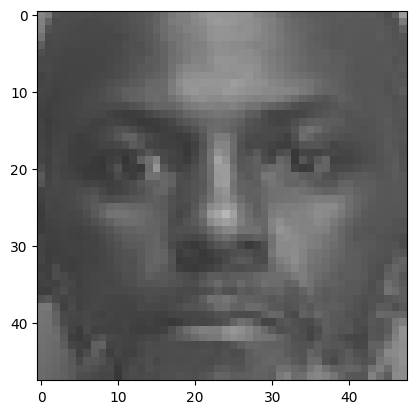

In [59]:
# Function to load a random image from a random folder for prediction
def load_random_image(test_folder):
    # Get the list of all subfolders (classes) in the test folder
    class_folders = os.listdir(test_folder)
    
    # Randomly select a class folder
    random_class = random.choice(class_folders)
    class_path = os.path.join(test_folder, random_class)
    
    # Get the list of all images in the selected class folder
    image_files = os.listdir(class_path)
    
    # Randomly select an image file
    random_image_file = random.choice(image_files)
    image_path = os.path.join(class_path, random_image_file)
    
    # Load and preprocess the image for prediction
    img = image.load_img(image_path, target_size=(48, 48))  # Same target size as training
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    return img_array, random_image_file, random_class

# Path to your test folder
test_folder = 'test/'

# Load a random image for prediction
random_image, image_name, folder_name = load_random_image(test_folder)

# Predict the class of the random image
prediction = model.predict(random_image)

# Print the predicted class
predicted_class = np.argmax(prediction)  # Get the index of the highest probability
print(f"Randomly selected image: {image_name} from folder: {folder_name}")
img = image.load_img(f"test/{folder_name}/{image_name}")
plt.imshow(img)

if predicted_class == 0:
    print("angry")
elif predicted_class == 1:
    print("disgusted")
elif predicted_class == 2:
    print("fearful")
elif predicted_class == 3:
    print("happy")
elif predicted_class == 4:
    print("neutral")
elif predicted_class == 5:
    print("sad")
else:
    print("Surprised")

In [60]:
model.save("emotion_detection_model.h5")